# Reliance Stock Prediction

### dependent variable = Close Price

### 1. Import required packages

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

import statsmodels.api as sm

from statsmodels.tsa.stattools import acf, pacf
from math import sqrt
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
from pandas.tseries.offsets import DateOffset

### Read the data from the Source

In [2]:
stock_data = pd.read_csv('reliance_stock_data_(1990-2023).csv')
stock_data

,Date,Price,Open,High,Low,Volume,Change%
0,Jan 02 1990,7.27,7.31,7.44,7.14,0,-1.62%
1,Jan 03 1990,6.92,7.18,7.18,6.84,0,-4.81%
2,Jan 04 1990,6.50,6.24,6.58,6.24,0,-6.07%
3,Jan 05 1990,6.71,6.37,6.71,6.37,0,3.23%
4,Jan 08 1990,6.71,7.05,7.05,6.67,0,0.00%
...,...,...,...,...,...,...,...
8175,Dec 11 2023,2459.05,2452.15,2467.40,2452.15,169.52K,+0.12%
8176,Dec 12 2023,2423.95,2458.00,2464.90,2420.25,98.11K,-1.43%
8177,Dec 13 2023,2433.40,2427.75,2438.00,2406.30,137.30K,+0.39%
8178,Dec 14 2023,2464.50,2453.00,2475.00,2442.70,3.65M,+1.28%


In [3]:
stock_data.columns

Index(['Date', ' Price', ' Open', ' High', ' Low', ' Volume', ' Change%'], dtype='object')

In [4]:
stock_data.isnull().sum()

Date        0
 Price      0
 Open       0
 High       0
 Low        0
 Volume     0
 Change%    0
dtype: int64

In [5]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8180 entries, 0 to 8179
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      8180 non-null   object 
 1    Price    8180 non-null   float64
 2    Open     8180 non-null   float64
 3    High     8180 non-null   float64
 4    Low      8180 non-null   float64
 5    Volume   8180 non-null   object 
 6    Change%  8180 non-null   object 
dtypes: float64(4), object(3)
memory usage: 447.5+ KB


In [6]:
stock_data = stock_data.drop([' Open',' High',' Low',' Volume',' Change%'], axis=1)
stock_data

,Date,Price
0,Jan 02 1990,7.27
1,Jan 03 1990,6.92
2,Jan 04 1990,6.50
3,Jan 05 1990,6.71
4,Jan 08 1990,6.71
...,...,...
8175,Dec 11 2023,2459.05
8176,Dec 12 2023,2423.95
8177,Dec 13 2023,2433.40
8178,Dec 14 2023,2464.50


In [7]:
stock_data.set_index(pd.to_datetime(stock_data['Date']), inplace=True)  # Set 'Date' as index
stock_data.drop(columns=['Date'], inplace=True)  # Drop the 'Date' column

In [8]:
stock_data

,Price
Date,
1990-01-02,7.27
1990-01-03,6.92
1990-01-04,6.50
1990-01-05,6.71
1990-01-08,6.71
...,...
2023-12-11,2459.05
2023-12-12,2423.95
2023-12-13,2433.40


In [9]:
# Convert the index to datetime format
stock_data.index = pd.to_datetime(stock_data.index, format='%b %d %Y')

# Format the index as 'YYYY-MM-DD' string if needed
stock_data.index = stock_data.index.strftime('%Y-%m-%d')

# Display the updated DataFrame with the modified index
print(stock_data)

              Price
Date               
1990-01-02     7.27
1990-01-03     6.92
1990-01-04     6.50
1990-01-05     6.71
1990-01-08     6.71
...             ...
2023-12-11  2459.05
2023-12-12  2423.95
2023-12-13  2433.40
2023-12-14  2464.50
2023-12-15  2495.20

[8180 rows x 1 columns]


In [10]:
stock_data = stock_data.rename(columns={' Price':'Price'})

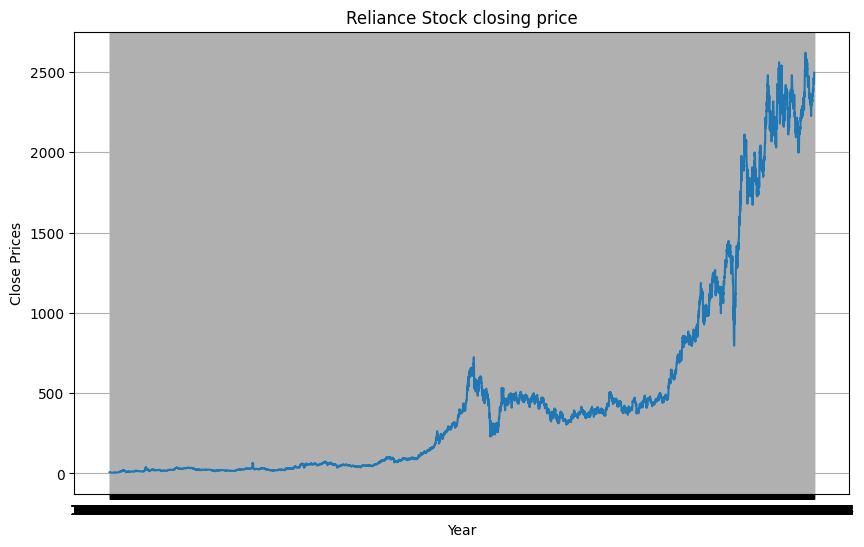

In [11]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Close Prices')
plt.plot(stock_data['Price'])
plt.title('Reliance Stock closing price')
plt.show()

<Axes: >

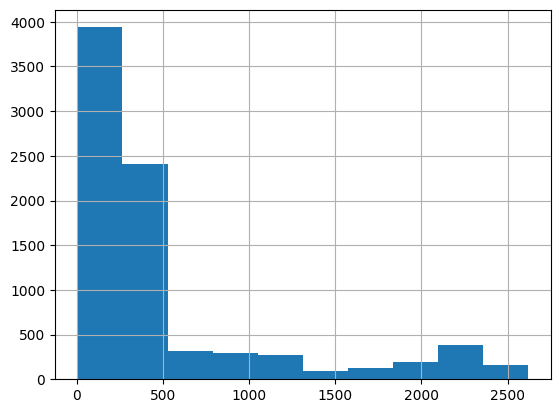

In [12]:
stock_data['Price'].hist()

<Axes: ylabel='Density'>

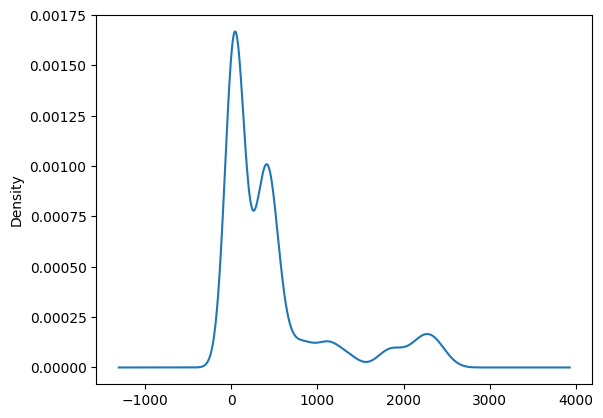

In [13]:
#Distribution of the dataset
df_close = stock_data['Price']
df_close.plot(kind='kde')

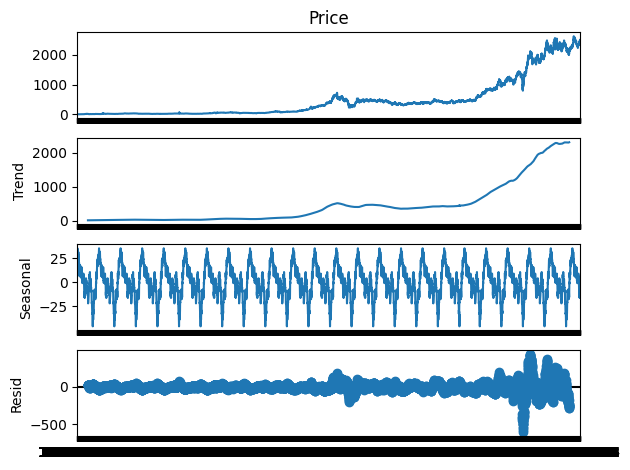

In [14]:
dec=seasonal_decompose(stock_data.Price,period=350)
dec.plot()
plt.show()

In [15]:
stock_data['Price'].describe()

count    8180.000000
mean      483.773132
std       651.354380
min         4.360000
25%        33.980000
50%       307.170000
75%       483.885000
max      2619.850000
Name: Price, dtype: float64

In [16]:
X = stock_data.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=62.403694, mean2=905.142570
variance1=5352.210775, variance2=487964.708788


# Augmented Dickey fuller test.

In [17]:
def TestStationaryPlot(stock_data):
    rol_mean = stock_data.rolling(window = 50, center = False).mean()
    rol_std = stock_data.rolling(window = 50, center = False).std()
    
    plt.plot(stock_data, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    
    plt.xlabel('Time in Years', fontsize = 10)
    plt.ylabel('Closing Price', fontsize = 10)
    plt.legend(loc='best', fontsize = 10)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 10)
    plt.show(block= True)

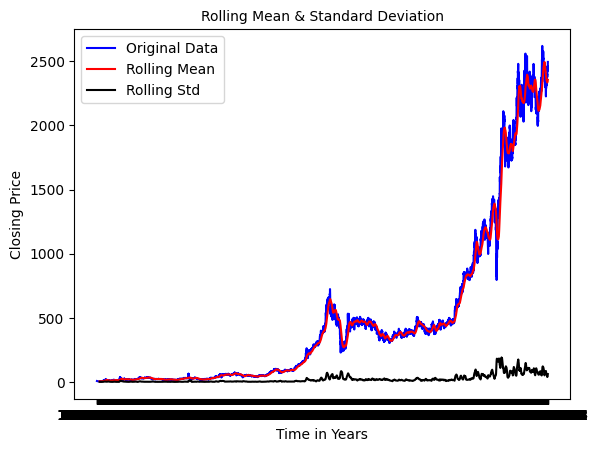

In [18]:
TestStationaryPlot(stock_data)

In [19]:
# null Hypothesis : Data is stationary
#alternate hypothesis : Data is not stationary
def TestStationaryAdfuller(stock_data, cutoff=0.01):
    stock_data_test = adfuller(stock_data, autolag='AIC')
    stock_data_test_output = pd.Series(stock_data_test[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])

    for key, value in stock_data_test[4].items():
        stock_data_test_output[f'Critical Value ({key})'] = value
    print(stock_data_test_output)

    if stock_data_test[1] <= cutoff:
        print("Failed to reject null hypothesis. Data is stationary")
    else:
        print("Failed to accept null hypothesis. Data is non-stationary")


In [20]:
TestStationaryAdfuller(stock_data)

Test Statistic                    1.778975
p-value                           0.998306
Lags Used                        37.000000
Number of Observations Used    8142.000000
Critical Value (1%)              -3.431153
Critical Value (5%)              -2.861895
Critical Value (10%)             -2.566959
dtype: float64
Failed to accept null hypothesis. Data is non-stationary


# Transforming Data into Stationary

# A) Moving Average Method

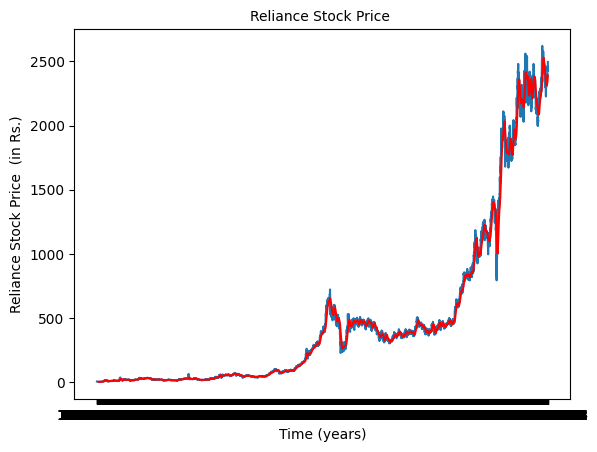

In [21]:
moving_avg = stock_data.rolling(30).mean()
plt.plot(stock_data)
plt.plot(moving_avg, color='red')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Time (years)', fontsize = 10)
plt.ylabel('Reliance Stock Price  (in Rs.)', fontsize = 10)
plt.title('Reliance Stock Price ', fontsize = 10)
plt.show()

In [22]:
moving_avg_diff = stock_data - moving_avg
moving_avg_diff.head(15)

,Price
Date,
1990-01-02,NaN
1990-01-03,NaN
1990-01-04,NaN
1990-01-05,NaN
1990-01-08,NaN
1990-01-09,NaN
1990-01-10,NaN
1990-01-11,NaN
1990-01-15,NaN


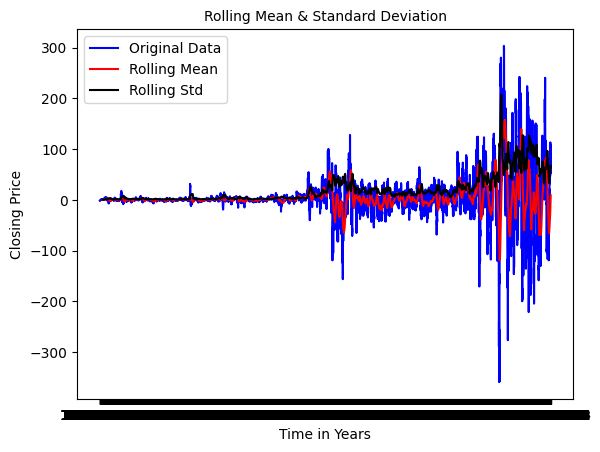

In [23]:
moving_avg_diff.dropna(inplace=True)
TestStationaryPlot(moving_avg_diff)

In [24]:
TestStationaryAdfuller(moving_avg_diff)

Test Statistic                -1.222617e+01
p-value                        1.079292e-22
Lags Used                      3.700000e+01
Number of Observations Used    8.113000e+03
Critical Value (1%)           -3.431156e+00
Critical Value (5%)           -2.861896e+00
Critical Value (10%)          -2.566960e+00
dtype: float64
Failed to reject null hypothesis. Data is stationary


## First Order Differencing

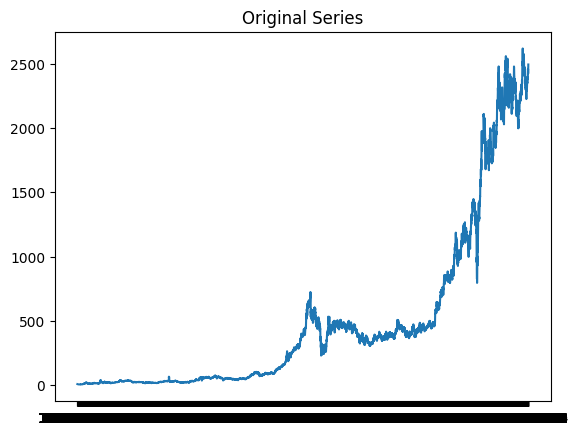

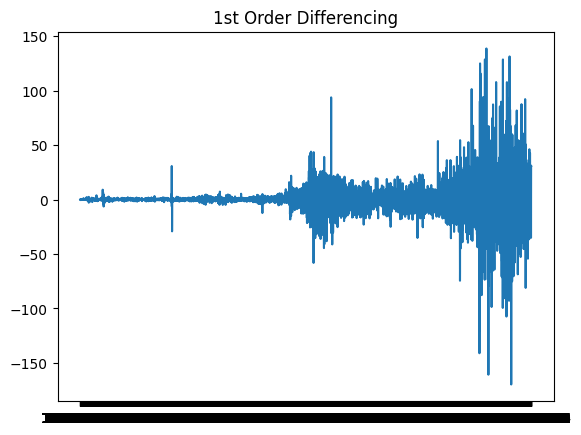

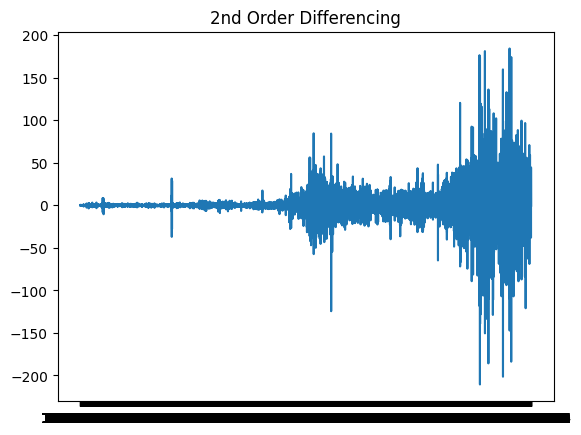

In [25]:
# Assuming 'stock_data' is your pandas Series/DataFrame containing the stock data

# Original Series
plt.plot(stock_data)
plt.title('Original Series')
plt.show()

# 1st Differencing
stock_data_first_difference = stock_data.diff()
plt.plot(stock_data_first_difference)
plt.title('1st Order Differencing')
plt.show()

# 2nd Differencing
stock_data_second_difference = stock_data.diff().diff()
plt.plot(stock_data_second_difference)
plt.title('2nd Order Differencing')
plt.show()


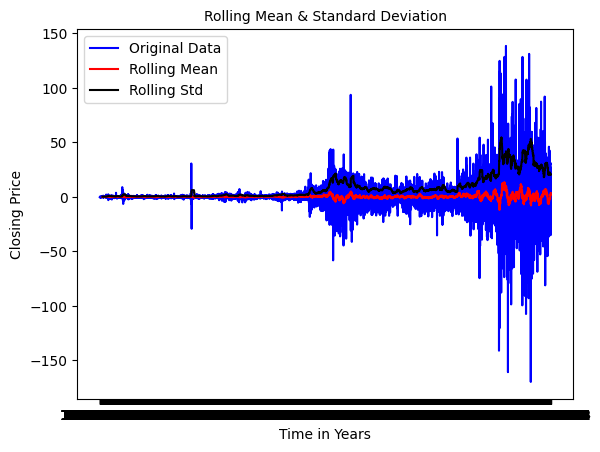

In [26]:
stock_data_first_difference = stock_data - stock_data.shift(1)  
TestStationaryPlot(stock_data_first_difference.dropna(inplace=False))

In [27]:
TestStationaryAdfuller(stock_data_first_difference.dropna(inplace=False))

Test Statistic                -1.639167e+01
p-value                        2.690456e-29
Lags Used                      3.600000e+01
Number of Observations Used    8.142000e+03
Critical Value (1%)           -3.431153e+00
Critical Value (5%)           -2.861895e+00
Critical Value (10%)          -2.566959e+00
dtype: float64
Failed to reject null hypothesis. Data is stationary


# Trend & Seasonality Plot

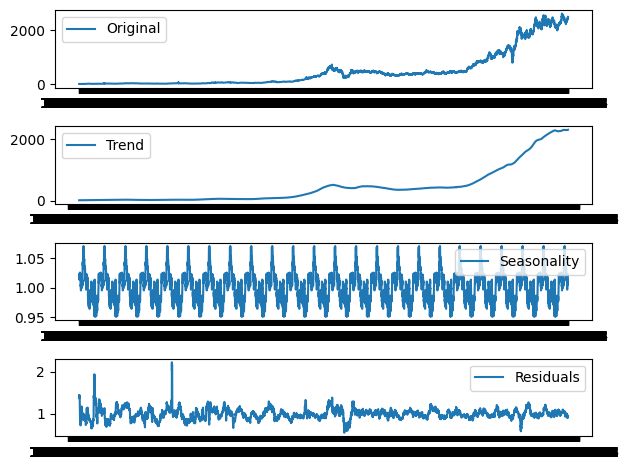

In [28]:
decomposition = seasonal_decompose(stock_data,period=350,model="multiplicable")

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(stock_data, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

### ACF & PACF Plots

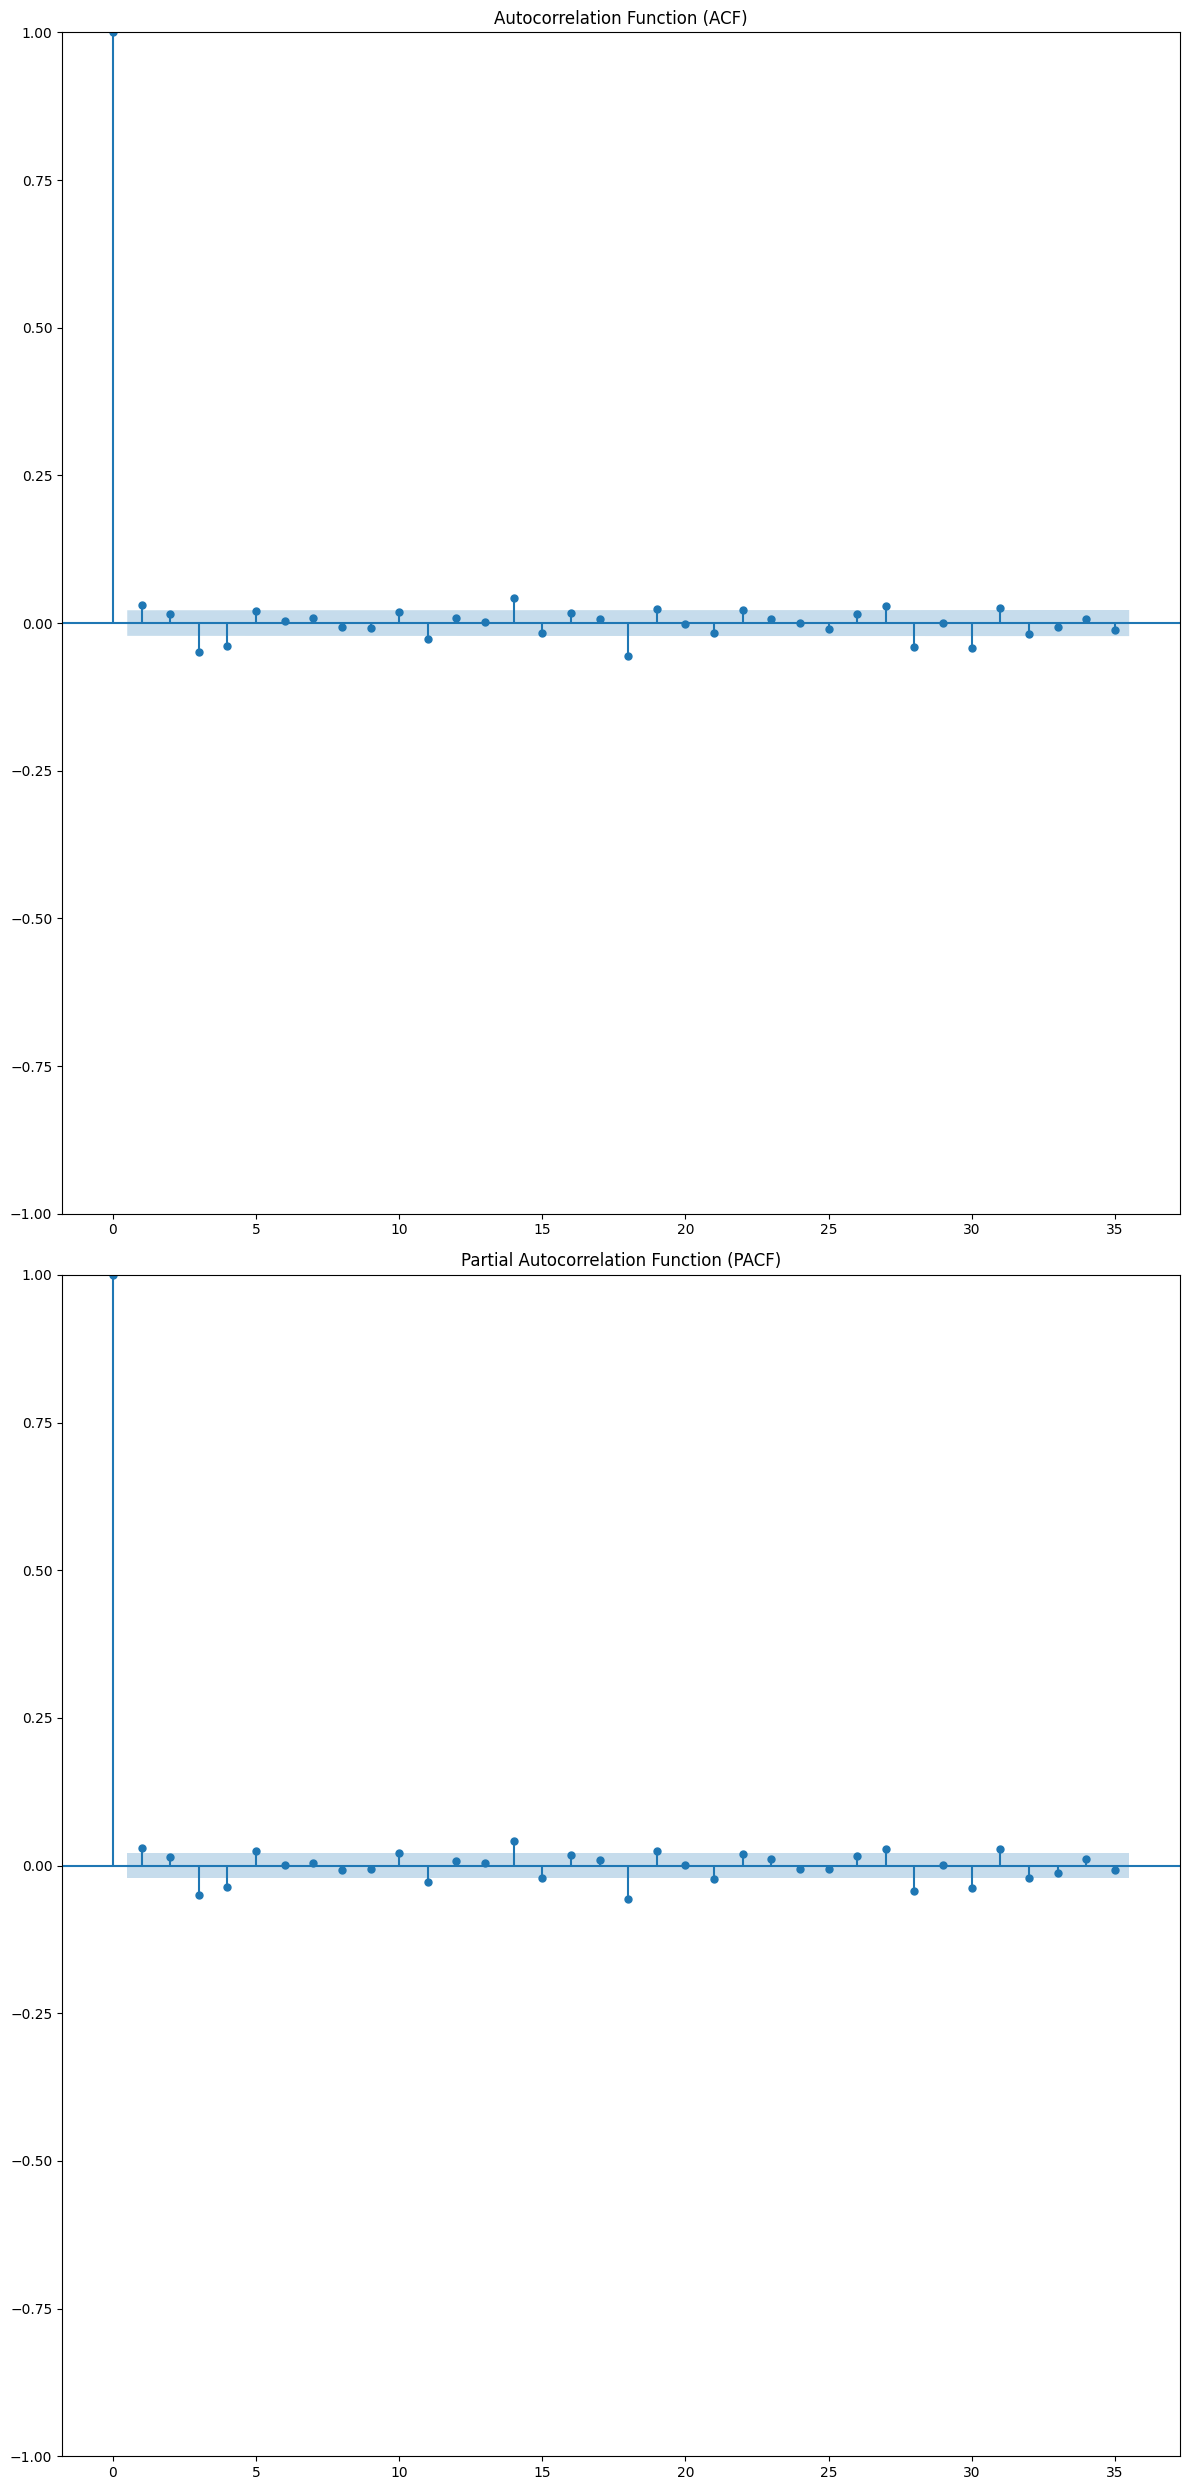

In [29]:
fig = plt.figure(figsize=(12, 25))  # Adjusting the figure size to fit both plots
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(stock_data_first_difference.dropna(inplace=False), lags=35, ax=ax1) 
ax1.set_title('Autocorrelation Function (ACF)')

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(stock_data_first_difference.dropna(inplace=False), lags=35, ax=ax2) 
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

## Data Partitioning

In [30]:
train_data = stock_data.iloc[:7447]
test_data = stock_data.iloc[7447:8180]
train_data

,Price
Date,
1990-01-02,7.27
1990-01-03,6.92
1990-01-04,6.50
1990-01-05,6.71
1990-01-08,6.71
...,...
2020-12-24,1810.41
2020-12-28,1818.71
2020-12-29,1806.68


In [31]:
test_data

,Price
Date,
2021-01-01,1804.37
2021-01-04,1807.41
2021-01-05,1784.94
2021-01-06,1737.87
2021-01-07,1735.05
...,...
2023-12-11,2459.05
2023-12-12,2423.95
2023-12-13,2433.40


### from First order Differencing we consider d=1 & from ACF & PACF plots we consider p=2,3,4 & q=1


## Various ARIMA MODELs

## ARIMA(2,1,1)

In [32]:
# Build Model
model_arima = ARIMA(train_data['Price'],order = (2,1,1))
model_arima = model_arima.fit()
model_arima.summary()

/home/sumit/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sumit/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sumit/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sumit/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sumit/.l

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                 7447
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -27824.301
Date:                Fri, 22 Dec 2023   AIC                          55656.602
Time:                        23:28:21   BIC                          55684.263
Sample:                             0   HQIC                         55666.104
                               - 7447                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8575      0.026    -33.596      0.000      -0.908      -0.807
ar.L2         -0.0114      0.004     -2.679      0.007      -0.020      -0.003
ma.L1          0.8654      0.026     32.853      0.000       0.814       0.917
sigma2       103.1004      0.371    277.597      0.000     102.372     103.828
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            594612.75
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):             164.08   Skew:                             0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                        46.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
train_data['Price']

Date
1990-01-02       7.27
1990-01-03       6.92
1990-01-04       6.50
1990-01-05       6.71
1990-01-08       6.71
               ...   
2020-12-24    1810.41
2020-12-28    1818.71
2020-12-29    1806.68
2020-12-30    1811.63
2020-12-31    1802.37
Name: Price, Length: 7447, dtype: float64

In [34]:
start = len(train_data)
end = len(train_data)+len(test_data)-1
pred_arima = model_arima.predict(start=start,end=end)
pred_arima

/home/sumit/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


7447    1802.603407
7448    1802.509189
7449    1802.587310
7450    1802.521400
7451    1802.577023
           ...     
8175    1802.551566
8176    1802.551566
8177    1802.551566
8178    1802.551566
8179    1802.551566
Name: predicted_mean, Length: 733, dtype: float64

In [35]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'mape':mape, 'me':me, 'mae': mae, 'rmse':rmse})

In [36]:
ns_arima_acc = forecast_accuracy(pred_arima.values, test_data.values)
ns_arima_acc

{'mape': 0.17436744618713926,
 'me': -393.5217511381388,
 'mae': 399.5197741445283,
 'rmse': 446.9288252970488}

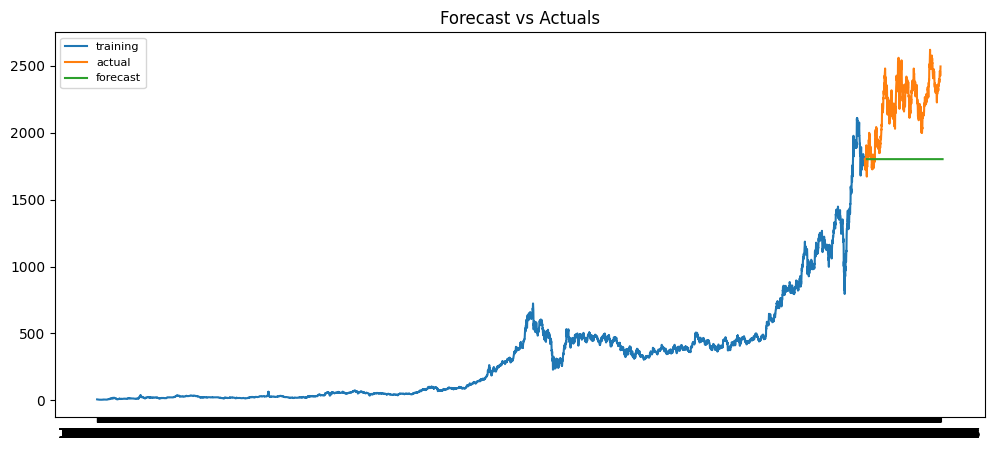

In [37]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, label='actual')
plt.plot(pred_arima, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# Make a pandas series
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, label='Actual Stock Price')
plt.plot(pred_arima, label='Predicted Stock Price')
plt.title('Reliance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Reliance Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# ARIMA(4,1,3)

In [ ]:
Model_arima = ARIMA(train_data['Price'],order = (4,1,3))
Model_arima = Model_arima.fit()
Model_arima.summary()

In [ ]:
start = len(train_data)
end = len(train_data)+len(test_data)-1
Pred_arima = Model_arima.predict(start=start,end=end)
print(Pred_arima)

In [ ]:
Ns_arima_acc = forecast_accuracy(Pred_arima.values, test_data.values)
Ns_arima_acc

In [ ]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, label='actual')
plt.plot(Pred_arima, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## Smoothing Technique Methods

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

## Simple Exponential Smoothing 

In [ ]:
SES = SimpleExpSmoothing(train_data['Price']).fit(smoothing_level = 0.2)

In [ ]:
pred_ses = SES.predict(start = len(train_data),end = len(train_data)+len(test_data)-1)

In [ ]:
ns_ses_acc = forecast_accuracy(pred_ses.values,test_data.values)
ns_ses_acc

In [ ]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, label='actual')
plt.plot(pred_ses, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## Holt's Method

In [ ]:
HLT= Holt(train_data["Price"]).fit(smoothing_level=0.8, smoothing_slope=0.2)

In [ ]:
pred_holt = HLT.predict(start = len(train_data),end = len(train_data)+len(test_data)-1)

In [ ]:
ns_hlt_acc = forecast_accuracy(pred_holt.values,test_data.values)
ns_hlt_acc

In [ ]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, label='actual')
plt.plot(pred_holt, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## Holt-Winter Method

In [ ]:
HLW = ExponentialSmoothing(train_data['Price'],seasonal='add',trend='add',seasonal_periods=2).fit()

In [ ]:
pred_hlw=HLW.predict(start = len(train_data),end = len(train_data)+len(test_data)-1)

In [ ]:
ns_hlw_acc = forecast_accuracy(pred_hlw.values,test_data.values)
ns_hlw_acc

In [ ]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, label='actual')
plt.plot(pred_hlw, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## Modelwise Errors

### Model Sorted by the RMSE values

In [ ]:
data = {"MODEL":pd.Series(["ARIMA(2,1,1)","ARIMA(4,1,3)","Simple exponential smoothing","Holt Method","Holt-Winter Method"]),
"RMSE_values":pd.Series([ns_arima_acc["rmse"],Ns_arima_acc["rmse"],ns_ses_acc["rmse"],ns_hlt_acc["rmse"],ns_hlw_acc["rmse"]]),
"MAPE_values":pd.Series([ns_arima_acc["mape"],Ns_arima_acc["mape"],ns_ses_acc["mape"],ns_hlt_acc["mape"],ns_hlw_acc["mape"]]),
"ME_values":pd.Series([ns_arima_acc["me"],Ns_arima_acc["me"],ns_ses_acc["me"],ns_hlt_acc["me"],ns_hlw_acc["me"]]),
"MAE_values":pd.Series([ns_arima_acc["mae"],Ns_arima_acc["mae"],ns_ses_acc["mae"],ns_hlt_acc["mae"],ns_hlw_acc["mae"]])}

table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_values'])

### Model Sorted by the MAPE values

In [ ]:
tata = {"MODEL":pd.Series(["ARIMA(2,1,1)","ARIMA(4,1,3)","Simple exponential smoothing","Holt Method","Holt-Winter Method"]),
"RMSE_values":pd.Series([ns_arima_acc["rmse"],Ns_arima_acc["rmse"],ns_ses_acc["rmse"],ns_hlt_acc["rmse"],ns_hlw_acc["rmse"]]),
"MAPE_values":pd.Series([ns_arima_acc["mape"],Ns_arima_acc["mape"],ns_ses_acc["mape"],ns_hlt_acc["mape"],ns_hlw_acc["mape"]]),
"ME_values":pd.Series([ns_arima_acc["me"],Ns_arima_acc["me"],ns_ses_acc["me"],ns_hlt_acc["me"],ns_hlw_acc["me"]]),
"MAE_values":pd.Series([ns_arima_acc["mae"],Ns_arima_acc["mae"],ns_ses_acc["mae"],ns_hlt_acc["mae"],ns_hlw_acc["mae"]])}

table_mape=pd.DataFrame(tata)
table_mape.sort_values(['MAPE_values'])

## Final Model

In [ ]:
final_arima = ARIMA(stock_data['Price'],order = (2,1,1))
final_arima = final_arima.fit()
final_arima.summary()

In [ ]:
final_arima.fittedvalues.tail(25)

In [ ]:
stock_data.tail(25)

In [ ]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(stock_data, label='original')
plt.title('Original')

plt.plot(final_arima.fittedvalues, label='forecast')
plt.title('Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# final_arima.forecast(steps=40)

In [ ]:
future_dates=[stock_data.index[-1]+ DateOffset(days=x)for x in range(0,60)]

In [ ]:
future_df=pd.DataFrame(index=future_dates[1:],columns=fd.columns)
future_df

In [ ]:
future_df['Price'] = final_arima.predict(start = 8180, end = 8194, dynamic= True)

In [ ]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(stock_data, label='original')

plt.plot(future_df['Price'], label='forecast')
plt.title('Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
future_df